# Problem Statement - 
### Given the input data which is the individual shares of preference for each product per each respondent you need to transform the data and to perform cluster analysis to identify grouping by cases of data based on the similarity of shares. After the clusters are build, we need a visual export of an dendrogram and a written explanation of each cluster i.e. what is the reasoning behind those groupings.



In [61]:
# Data Import and Analysis
import numpy as np
import pandas as pd
import xlrd


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive, VBox
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_excel('SDT data.xlsx')

In [3]:
data.head()

,ID,"Coca-Cola 0,5l PET","Coca-Cola 0,25l Sleek can","Coca-Cola 0,33l Can 15-pack","Coca-Cola 0,33l Can","Coca-Cola 1,5l PET 2-pack","Coca-Cola 1,5l PET","Coca-Cola Zero 0,5l PET","Coca-Cola Zero 0,25l Sleek can","Coca-Cola Zero 0,33l Can 6-pack",...,"Pepsi Max 0,33l Can 8-pack","Pepsi Max 0,33l Can 10-pack","Pepsi Max 0,33l Can 12-pack","Pepsi Max 0,33l Can 15-pack","Pepsi Max 0,33l Sleek can","Pepsi Max 0,33l Can","Pepsi Max 0,95l PET","Pepsi Max 1,5l PET 2-pack","Pepsi Max 1,5l PET",Pepsi Max 2l PET
0,2878.0,0.282215,0.004441,0.012106,0.028150,0.160348,0.028677,0.031408,0.002895,0.051033,...,0.000067,0.000080,0.000167,0.000033,0.000068,0.000115,0.000179,0.000101,0.000089,0.000097
1,2881.0,0.006717,0.012910,0.059791,0.009791,0.032862,0.020404,0.007766,0.003422,0.015516,...,0.002244,0.001900,0.006142,0.004223,0.001092,0.001074,0.003048,0.003345,0.001485,0.002528
2,2882.0,0.000675,0.001698,0.042056,0.002441,0.000936,0.000625,0.000510,0.003577,0.007988,...,0.000219,0.000942,0.001243,0.002537,0.000297,0.000141,0.000046,0.000028,0.000015,0.000021
3,2884.0,0.003455,0.006337,0.043434,0.013191,0.004986,0.006468,0.002578,0.014796,0.004300,...,0.000465,0.001017,0.001681,0.006326,0.001324,0.001289,0.001148,0.000804,0.002062,0.005594
4,2886.0,0.050186,0.005718,0.004105,0.006571,0.003021,0.009547,0.094383,0.025450,0.016448,...,0.026746,0.023528,0.010860,0.005492,0.009881,0.013335,0.015671,0.006119,0.018467,0.007691


In [4]:
data.shape

(1666, 72)

### Checking the structure of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 72 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     1665 non-null   float64
 1   Coca-Cola 0,5l PET                     1666 non-null   float64
 2   Coca-Cola 0,25l Sleek can              1666 non-null   float64
 3   Coca-Cola 0,33l Can 15-pack            1666 non-null   float64
 4   Coca-Cola 0,33l Can                    1666 non-null   float64
 5   Coca-Cola 1,5l PET 2-pack              1666 non-null   float64
 6   Coca-Cola 1,5l PET                     1666 non-null   float64
 7   Coca-Cola Zero 0,5l PET                1666 non-null   float64
 8   Coca-Cola Zero 0,25l Sleek can         1666 non-null   float64
 9   Coca-Cola Zero 0,33l Can 6-pack        1666 non-null   float64
 10  Coca-Cola Zero 0,33l Can 15-pack       1666 non-null   float64
 11  Coca

### Checking percentage of missing values

In [6]:
percent_missing =round(100*(data.isnull().sum())/len(data),2)
percent_missing

ID                             0.06
Coca-Cola 0,5l PET             0.00
Coca-Cola 0,25l Sleek can      0.00
Coca-Cola 0,33l Can 15-pack    0.00
Coca-Cola 0,33l Can            0.00
                               ... 
Pepsi Max 0,33l Can            0.00
Pepsi Max 0,95l PET            0.00
Pepsi Max 1,5l PET 2-pack      0.00
Pepsi Max 1,5l PET             0.00
Pepsi Max 2l PET               0.00
Length: 72, dtype: float64

In [7]:
data.dropna(inplace=True)

In [8]:
data['ID'] = data['ID'].astype('int32')

In [9]:
data.set_index(['ID'], drop=True, inplace=True )

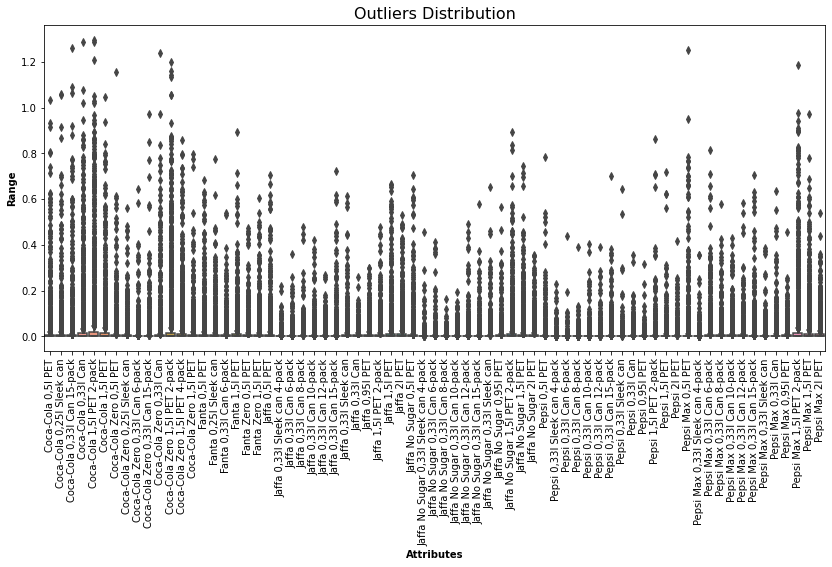

In [10]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    g = sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    g.tick_params(axis='x', rotation=90)
    

    
show_boxplot(data)

In [11]:
data.head()

,"Coca-Cola 0,5l PET","Coca-Cola 0,25l Sleek can","Coca-Cola 0,33l Can 15-pack","Coca-Cola 0,33l Can","Coca-Cola 1,5l PET 2-pack","Coca-Cola 1,5l PET","Coca-Cola Zero 0,5l PET","Coca-Cola Zero 0,25l Sleek can","Coca-Cola Zero 0,33l Can 6-pack","Coca-Cola Zero 0,33l Can 15-pack",...,"Pepsi Max 0,33l Can 8-pack","Pepsi Max 0,33l Can 10-pack","Pepsi Max 0,33l Can 12-pack","Pepsi Max 0,33l Can 15-pack","Pepsi Max 0,33l Sleek can","Pepsi Max 0,33l Can","Pepsi Max 0,95l PET","Pepsi Max 1,5l PET 2-pack","Pepsi Max 1,5l PET",Pepsi Max 2l PET
ID,,,,,,,,,,,,,,,,,,,,,
2878,0.282215,0.004441,0.012106,0.028150,0.160348,0.028677,0.031408,0.002895,0.051033,0.007674,...,0.000067,0.000080,0.000167,0.000033,0.000068,0.000115,0.000179,0.000101,0.000089,0.000097
2881,0.006717,0.012910,0.059791,0.009791,0.032862,0.020404,0.007766,0.003422,0.015516,0.015304,...,0.002244,0.001900,0.006142,0.004223,0.001092,0.001074,0.003048,0.003345,0.001485,0.002528
2882,0.000675,0.001698,0.042056,0.002441,0.000936,0.000625,0.000510,0.003577,0.007988,0.127182,...,0.000219,0.000942,0.001243,0.002537,0.000297,0.000141,0.000046,0.000028,0.000015,0.000021
2884,0.003455,0.006337,0.043434,0.013191,0.004986,0.006468,0.002578,0.014796,0.004300,0.039316,...,0.000465,0.001017,0.001681,0.006326,0.001324,0.001289,0.001148,0.000804,0.002062,0.005594
2886,0.050186,0.005718,0.004105,0.006571,0.003021,0.009547,0.094383,0.025450,0.016448,0.049845,...,0.026746,0.023528,0.010860,0.005492,0.009881,0.013335,0.015671,0.006119,0.018467,0.007691


In [15]:
data.iloc[10,4]

1.0518699760472157

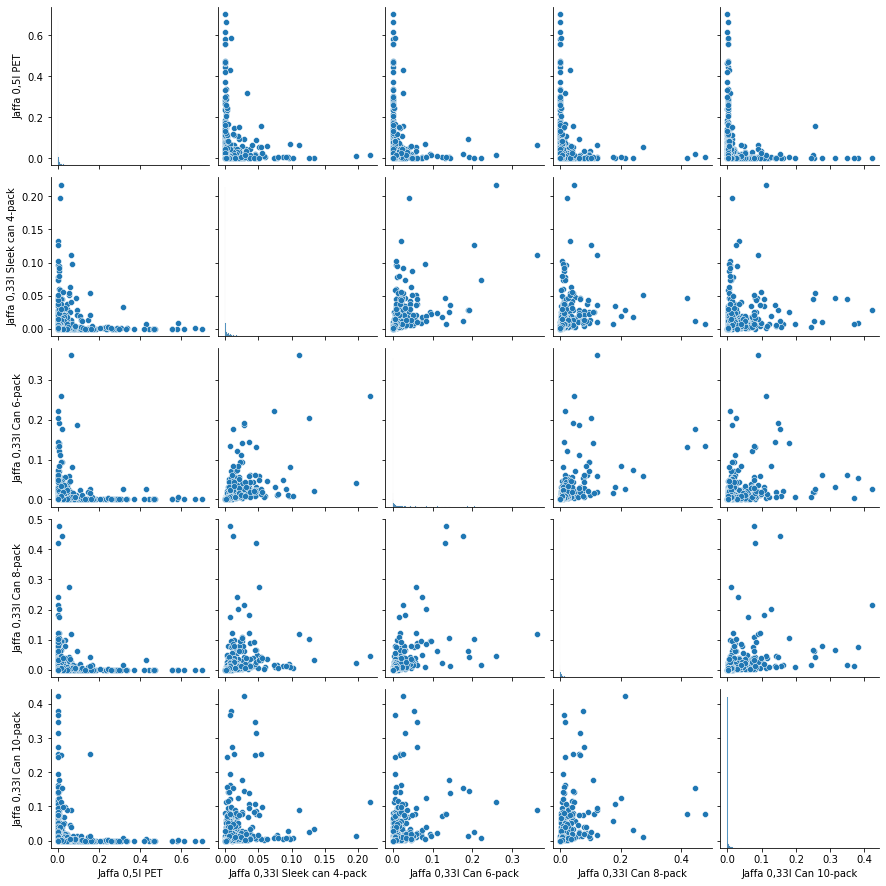

In [17]:
sns.pairplot(data.iloc[:,20:25])

In [16]:
values = data.values

### Data Distribution

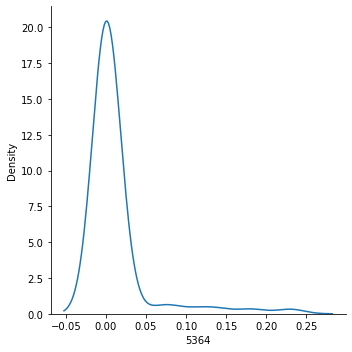

In [42]:
sns.displot(data=data, x = data.iloc[1400,:], kind='kde') 
plt.show()

> The data seems to centered around 0 with some outlying values. A histogram in which most of the data falls to the right of the graph's peak is known as a right-skewed histogram. It is also known as a positively skewed histogram. A right-skewed histogram has a definite relationship between its mean, median, and mode which can be written as mean > median > mode.

### Creating dendrograms based on different linkage methods and distance metrics

In [18]:
def create_dendrogram(method, metric):
    linkage_matrix = linkage(values, method=method, metric=metric)
    dend = dendrogram(linkage_matrix, leaf_rotation=90.)

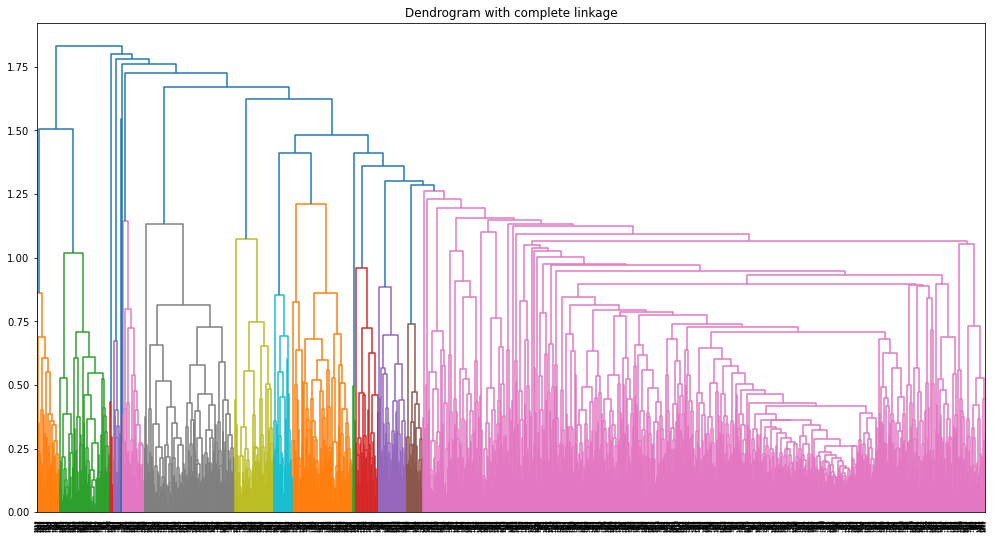

In [104]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with complete linkage")
create_dendrogram('complete', 'euclidean')

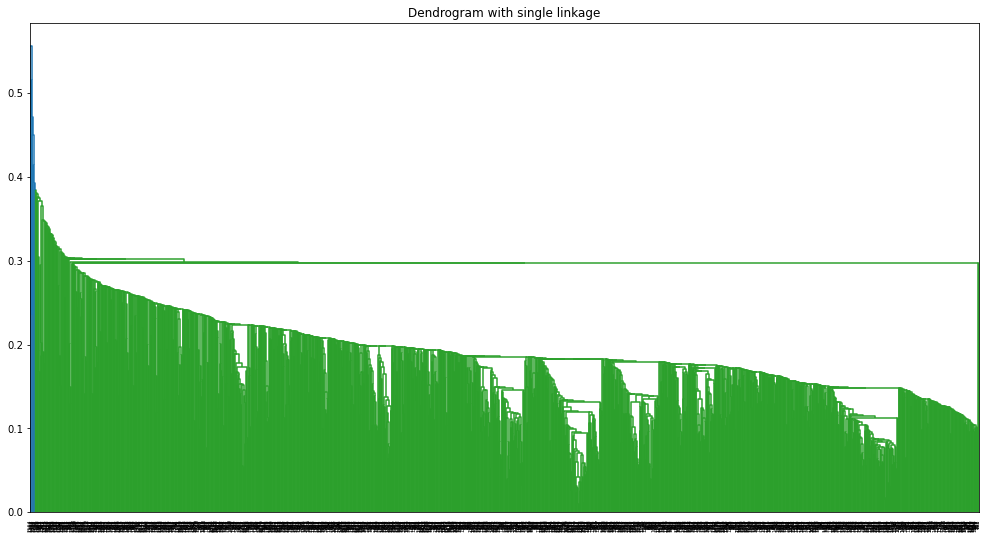

In [105]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with single linkage")
create_dendrogram('single', 'euclidean')

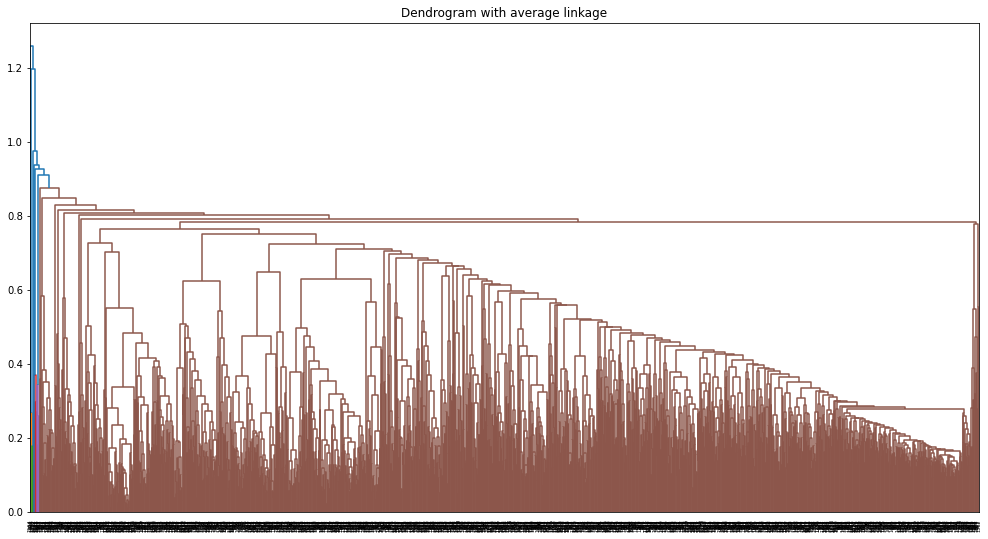

In [106]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with average linkage")
create_dendrogram('average', 'euclidean')

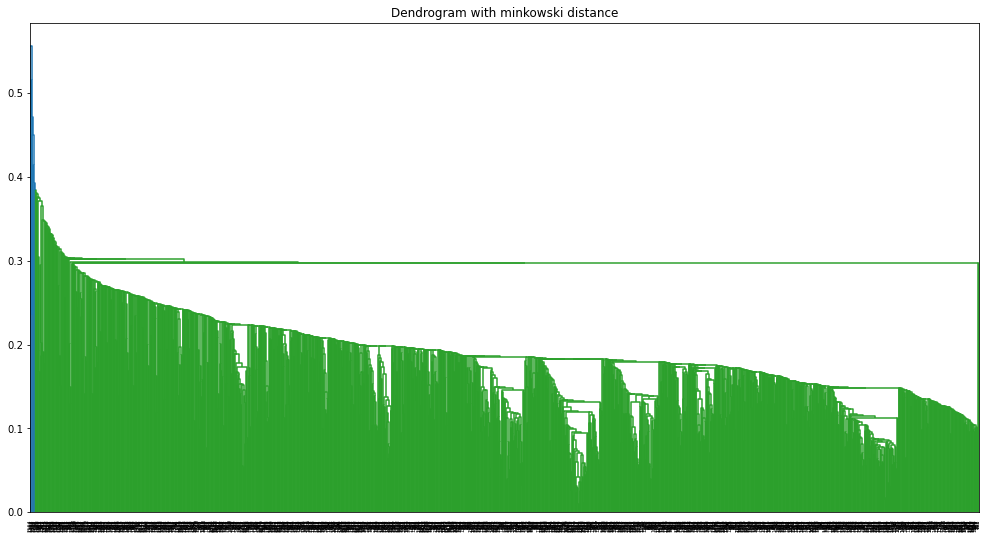

In [107]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with minkowski distance")
create_dendrogram('single', 'minkowski')

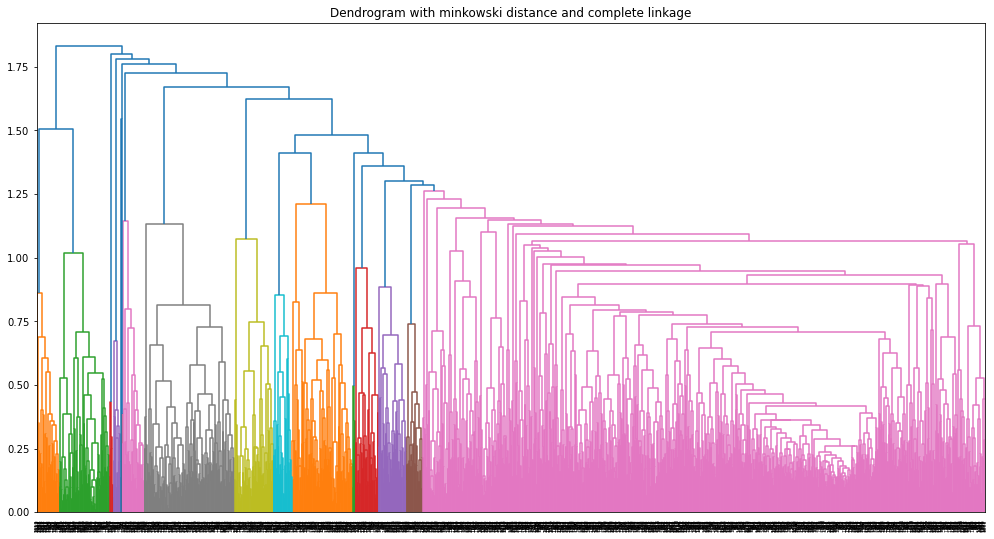

In [108]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with minkowski distance and complete linkage")
create_dendrogram('complete', 'minkowski')

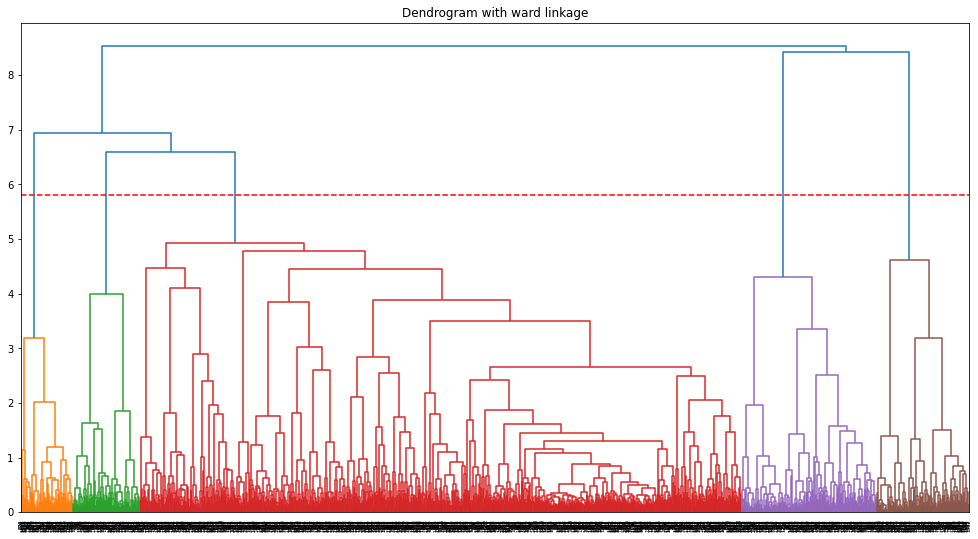

In [109]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with ward linkage")
create_dendrogram('ward', 'euclidean')
plt.axhline(y=5.8, color='r', linestyle='--')


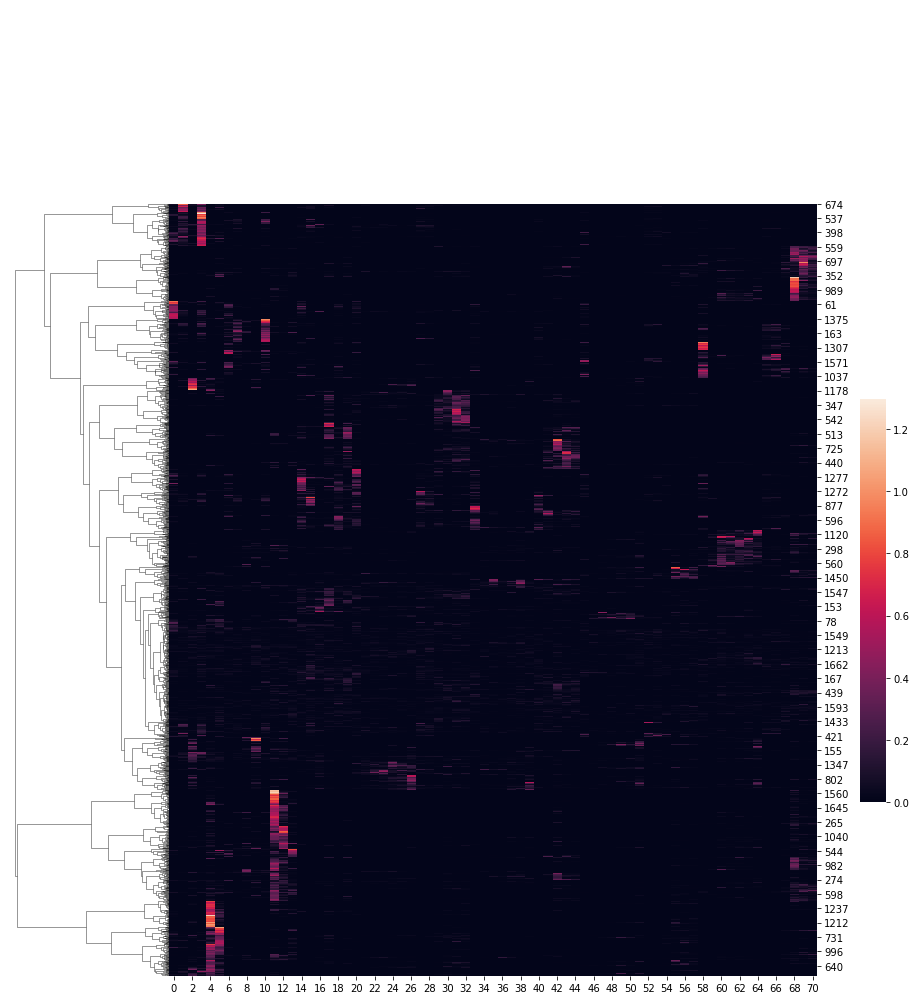

In [38]:
sns.clustermap(values,method='ward', 
               metric='euclidean', 
               col_cluster=False,
              figsize=(12, 14),
              cbar_pos=(1, .2, .03, .4),)

In [85]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Perplexity 10", "Perplexity 30", "Perplexity 50", "Perplexity 100"))

perplexities= [10, 30, 50, 100]
reduced_Xarr = []

for i in range(len(perplexities)): 
    X_to_plot = TSNE(n_components=2, perplexity = perplexities[i], random_state=0).fit_transform(data)
    reduced_Xarr.append(X_to_plot)
    if (i == 0) or (i == 1):
        j = 1
        fig.add_trace(go.Scatter(x=X_to_plot[:,0], y=X_to_plot[:,1],mode="markers"), row=j, col=i+1)
    else:
        j=2
        i = i-1
        fig.add_trace(go.Scatter(x=X_to_plot[:,0], y=X_to_plot[:,1],mode="markers", ),row=j, col=i)
        i = i+1

In [86]:
fig.update_layout(height=700, width=800,
                  title_text="Cluster structure after dimensionality reduction",
                 showlegend=False)
fig.show()

> Perplexity is a metric for how many neighbors a point has, and significantly affects the algorithm’s output.

In [19]:
hc_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward', compute_distances= True)  
clusters = hc_cluster.fit_predict(values)

In [20]:
len(clusters)

1665

In [21]:
np.unique(clusters)

array([0, 1, 2, 3, 4], dtype=int64)

In [22]:
data = pd.concat([data, pd.Series(clusters, name = 'cluster', index= data.index )], axis=1  ) 

In [147]:
data.drop('cluster', inplace=True, axis=1)

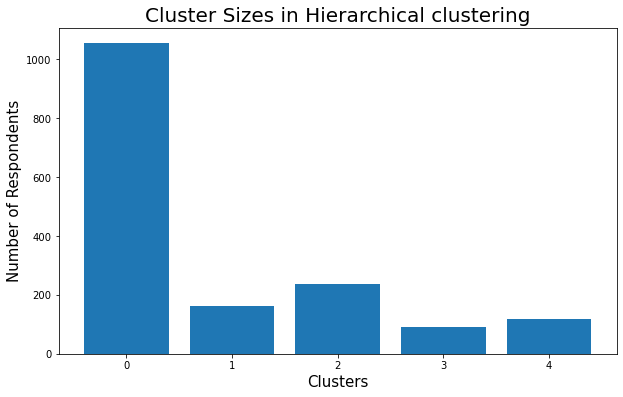

In [87]:
# Count the number of respondents in each cluster
cluster_sizes = pd.Series(clusters).value_counts()

# Create a bar chart for cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Clusters',fontdict={'fontsize':15})
plt.ylabel('Number of Respondents',fontdict={'fontsize':15})
plt.title('Cluster Sizes in Hierarchical clustering', fontdict={'fontsize':20})
plt.show()

# KMeans algorithm

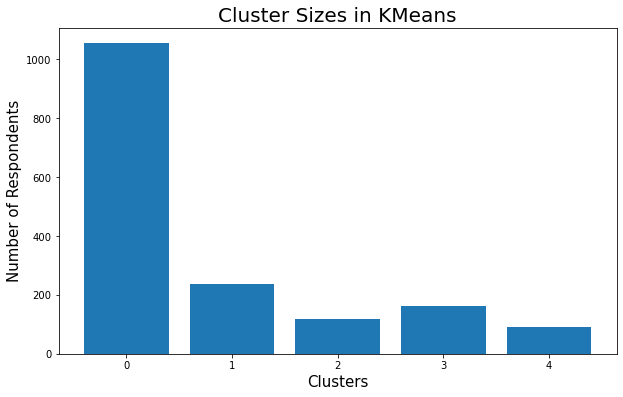

In [90]:
# The random_state needs to be the same number to get reproducible results
kmeans = KMeans(n_clusters=5, random_state=10) 
kmeans.fit(data)
cluster_kmean = kmeans.labels_

# Count the number of respondents in each cluster
cluster_sizes = pd.Series(cluster_kmean).value_counts()

# Create a bar chart for cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Clusters',fontdict={'fontsize':15})
plt.ylabel('Number of Respondents',fontdict={'fontsize':15})
plt.title('Cluster Sizes in KMeans', fontdict={'fontsize':20})
plt.show()

# data = pd.concat([data, pd.Series(cluster_kmean, name = 'cluster_kmean', index= data.index )], axis=1  ) 

# Clusters descriptive statistics

In [98]:
data.columns

Index(['Coca-Cola 0,5l PET', 'Coca-Cola 0,25l Sleek can',
       'Coca-Cola 0,33l Can 15-pack', 'Coca-Cola 0,33l Can',
       'Coca-Cola 1,5l PET 2-pack', 'Coca-Cola 1,5l PET',
       'Coca-Cola Zero 0,5l PET', 'Coca-Cola Zero 0,25l Sleek can',
       'Coca-Cola Zero 0,33l Can 6-pack', 'Coca-Cola Zero 0,33l Can 15-pack',
       'Coca-Cola Zero 0,33l Can', 'Coca-Cola Zero 1,5l PET 2-pack',
       'Coca-Cola Zero 1,5l PET 4-pack', 'Coca-Cola Zero 1,5l PET',
       'Fanta 0,5l PET', 'Fanta 0,25l Sleek can', 'Fanta 0,33l Can 6-pack',
       'Fanta 1,5l PET', 'Fanta Zero 0,5l PET', 'Fanta Zero 1,5l PET',
       'Jaffa 0,5l PET', 'Jaffa 0,33l Sleek can 4-pack',
       'Jaffa 0,33l Can 6-pack', 'Jaffa 0,33l Can 8-pack',
       'Jaffa 0,33l Can 10-pack', 'Jaffa 0,33l Can 12-pack',
       'Jaffa 0,33l Can 15-pack', 'Jaffa 0,33l Sleek can', 'Jaffa 0,33l Can',
       'Jaffa 0,95l PET', 'Jaffa 1,5l PET 2-pack', 'Jaffa 1,5l PET',
       'Jaffa 2l PET', 'Jaffa No Sugar 0,5l PET',
       'Jaffa No Su

In [97]:
# Calculate descriptive statistics for each cluster
cluster_statistics = data.groupby('cluster').describe()

# Display statistics for a specific cluster (replace 'cluster_number' with the desired cluster number)
# cluster_statistics.loc[4]
cluster_statistics

Coca-Cola 0,5l PET                                                  \
                     count      mean       std           min           25%   
cluster                                                                      
0                   1055.0  0.031917  0.108666  6.316837e-10  2.873393e-05   
1                    162.0  0.013988  0.036516  7.357056e-07  4.651415e-05   
2                    238.0  0.001614  0.008658  1.160398e-10  2.705362e-07   
3                     92.0  0.056842  0.076616  4.640432e-04  7.857185e-03   
4                    118.0  0.000702  0.003362  2.140264e-10  2.484614e-08   

                                          Coca-Cola 0,25l Sleek can            \
                  50%       75%       max                     count      mean   
cluster                                                                         
0        5.414604e-04  0.008181  1.034729                    1055.0  0.011778   
1        1.088258e-03  0.009590  0.282791                     162.0  0.009693   
2        6.278713e-06  0.000153  0.082689                     238.0  0.000973   
3        2.546023e-02  0.071337  0.328502                      92.0  0.222982   
4        9.283198e-07  0.000045  0.025900                     118.0  0.000593   

         ... Pepsi Max 2l PET           cluster_kmean                      \
         ...              75%       max         count mean  std  min  25%   
cluster  ...                                                                
0        ...         0.005092  0.249042        1055.0  1.0  0.0  1.0  1.0   
1        ...         0.001790  0.286016         162.0  2.0  0.0  2.0  2.0   
2        ...         0.018150  0.324817         238.0  3.0  0.0  3.0  3.0   
3        ...         0.000008  0.034961          92.0  0.0  0.0  0.0  0.0   
4        ...         0.169564  0.541408         118.0  4.0  0.0  4.0  4.0   

                        
         50%  75%  max  
cluster                 
0        1.0  1.0  1.0  
1        2.0  2.0  2.0  
2        3.0  3.0  3.0  
3        0.0  0.0  0.0  
4        4.0  4.0  4.0  

[5 rows x 576 columns]

In [29]:
cluster_statistics['Coca-Cola 0,5l PET']['mean']

cluster
0    0.031917
1    0.013988
2    0.001614
3    0.056842
4    0.000702
Name: mean, dtype: float64

In [92]:
cu = list(data.columns)
cu.remove('cluster')
cu.remove('cluster_kmean')

# Visualizating cluster characterstics

In [95]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive, VBox

def plot_cluster(cluster_number):
    # Calculate average preferences for the selected cluster
    cluster_preferences = data[data.cluster == cluster_number][cu].mean()
    
    # Create a bar chart for average preferences
    fig = px.bar(y=cluster_preferences.index, x=cluster_preferences.values, orientation='h',
                 labels={'y': 'Soft Drink Category', 'x': 'Average Preference'})
    fig.update_layout(height=750) 
    fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(title=f'Average Preferences in Cluster {cluster_number}' )
    fig.show()

# Define a dropdown widget for selecting the cluster
cluster_dropdown = widgets.Dropdown(options=cluster_sizes.index, description='Select Cluster:')




In [96]:
# Create an interactive plot
interactive_plot = interactive(plot_cluster, cluster_number=cluster_dropdown)
interactive_plot

interactive(children=(Dropdown(description='Select Cluster:', options=(0, 1, 3, 2, 4), value=0), Output()), _d…

In [99]:
def plot_softdrink(soft_drink):
    
    # Calculate average preferences for the selected softdrink within each cluster
    softdrink_preferences = cluster_statistics[soft_drink]['mean']
    
    # Create a bar chart for average preferences
    fig = px.bar(y=softdrink_preferences.values, x=softdrink_preferences.index, orientation='v',
                 labels={'x': 'Clusters', 'y': 'Average Preference'})
#     fig.update_layout(height=750) 
#     fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(title=f'Average cluster preference for {soft_drink}' )
    fig.show()

# Define a dropdown widget for selecting the cluster
softdrink_dropdown = widgets.Dropdown(options=cu, description='Select Soft drink:')

In [100]:
# Create an interactive plot
interactive_plot = interactive(plot_softdrink, soft_drink=softdrink_dropdown)
interactive_plot

interactive(children=(Dropdown(description='Select Soft drink:', options=('Coca-Cola 0,5l PET', 'Coca-Cola 0,2…